In [16]:
# 利用shap进行可视化，该方法可用于XGBoost、LightGBM、CatBoost、scikit-learn、pyspark tree等模型
# 这里就先以XGBoost模型为例

import xgboost
import shap

# 在使用SHAP进行可视化之前，需要调用shap.initjs()来初始化JavaScript库。这样可以确保SHAP的可视化功能正常运行
shap.initjs()

# 训练一个XGBoost模型
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# shap.Explainer(model) 创建一个解释器，用于计算每个特征对模型预测的贡献
# shap_values是一个包含每个样本的SHAP值的数组，表示每个特征对模型预测的贡献。
explainer = shap.Explainer(model)
shap_values = explainer(X)


In [17]:
# 查看其中一个样本的shap值
shap_values[0]

.values =
array([ 1.7081785 ,  0.09363674,  0.19277047,  0.01245449, -0.05390611,
        0.01571906, -0.39385185,  0.55515116], dtype=float32)

.base_values =
2.0684865

.data =
array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

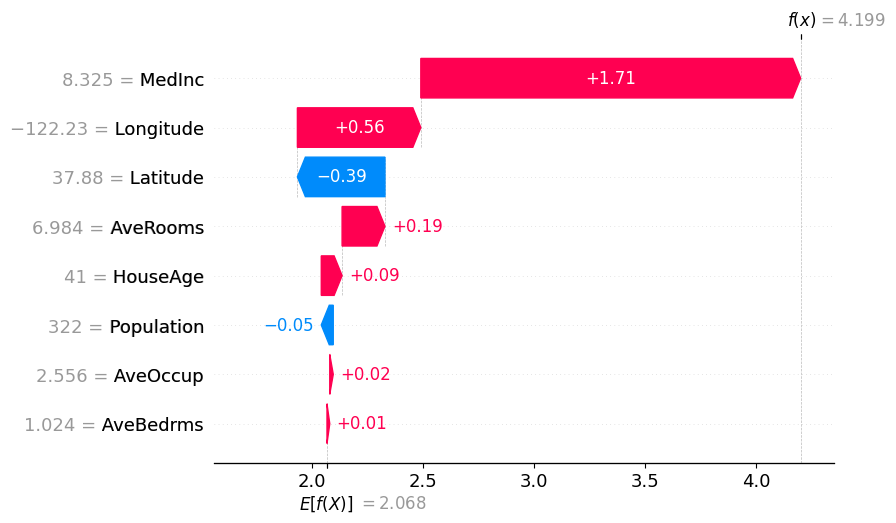

In [18]:
# 使用 瀑布图 来展示第 0 个样本的SHAP值解释
shap.plots.waterfall(shap_values[0])

In [19]:
# 使用 力图 来展示第 0 个样本的SHAP值解释
shap.plots.force(shap_values[0])

In [20]:
# 使用多样本，以力图的形式进行可视化
shap.plots.force(shap_values[:500])

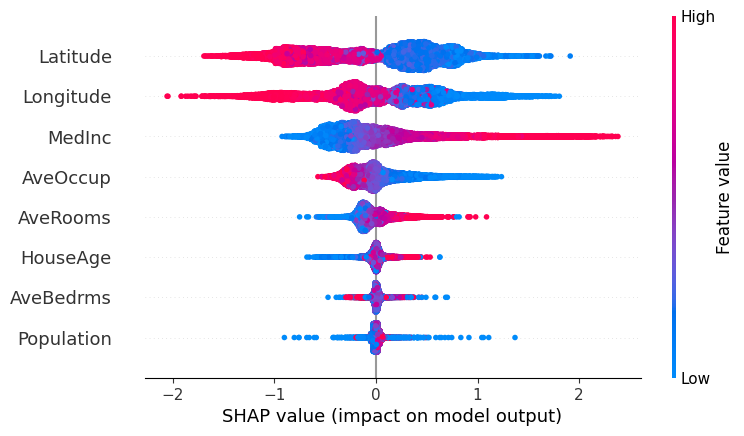

In [21]:
# 绘制SHAP值的蜂群图（Beeswarm plot），帮助可视化模型预测中所有特征的影响和分布情况
shap.plots.beeswarm(shap_values)

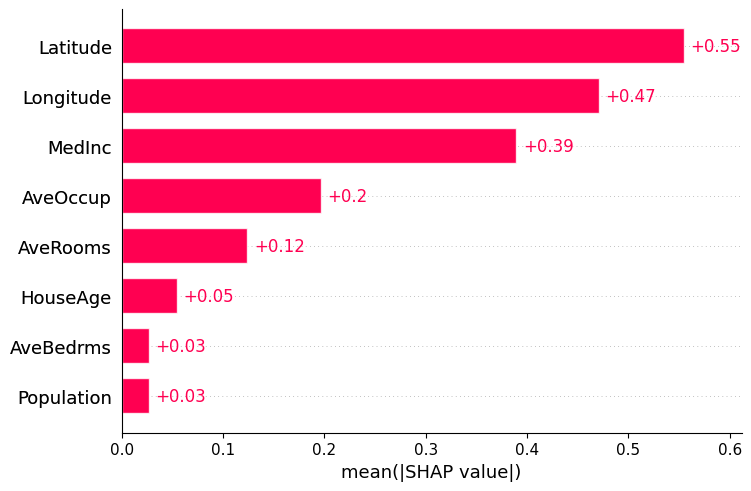

In [23]:
# 取每个特征的SHAP值的绝对值的平均值作为该特征的重要性
shap.plots.bar(shap_values)

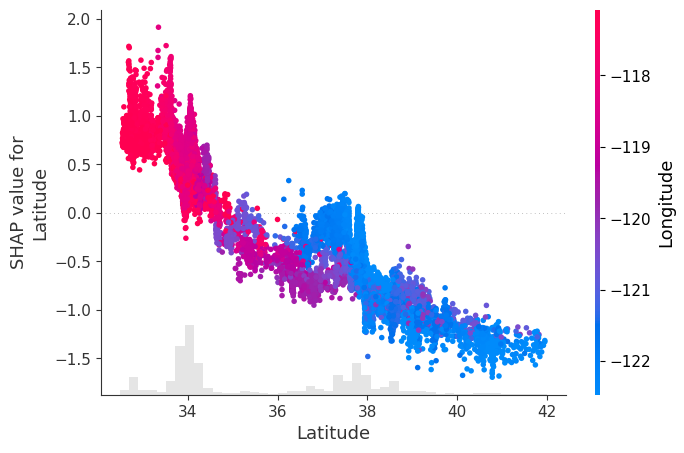

In [27]:
# 创建一个相关性散点图，以显示单个特征在整个数据集中的影响
# shap_values[:, "Latitude"] 表示选取所有样本中“Latitude”特征的SHAP值
# 这里选取Longitude，查看它与Latitude之间的关联
shap.plots.scatter(shap_values[:,"Latitude"], color=shap_values[:,"Longitude"])

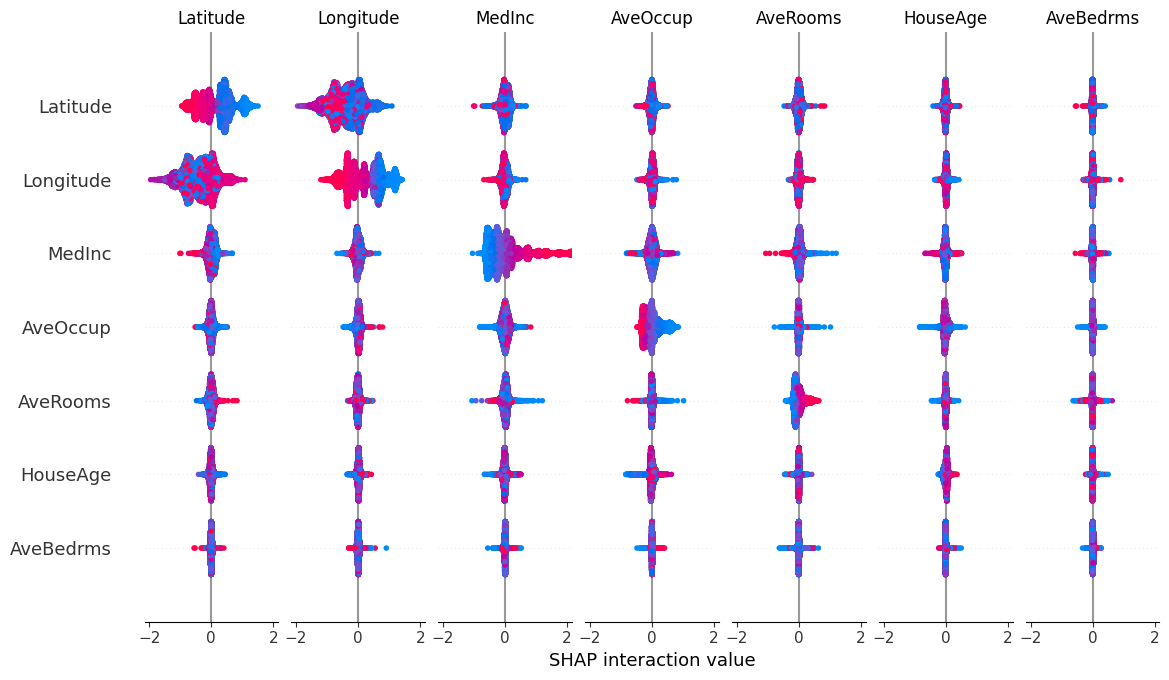

In [28]:
# 特征交互解释
# 这些交互值可以解释每对特征对模型预测的交互影响，量化了两个特征之间相互作用的贡献
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

In [29]:
print(shap_values[0][0])    # 第0个样本的第0个特征的SHAP
print(shap_interaction_values[0][0].sum())  # 第0个样本的第0个特征的交互SHAP之和

.values =
1.7081785

.base_values =
2.0684865

.data =
8.3252
1.7081788


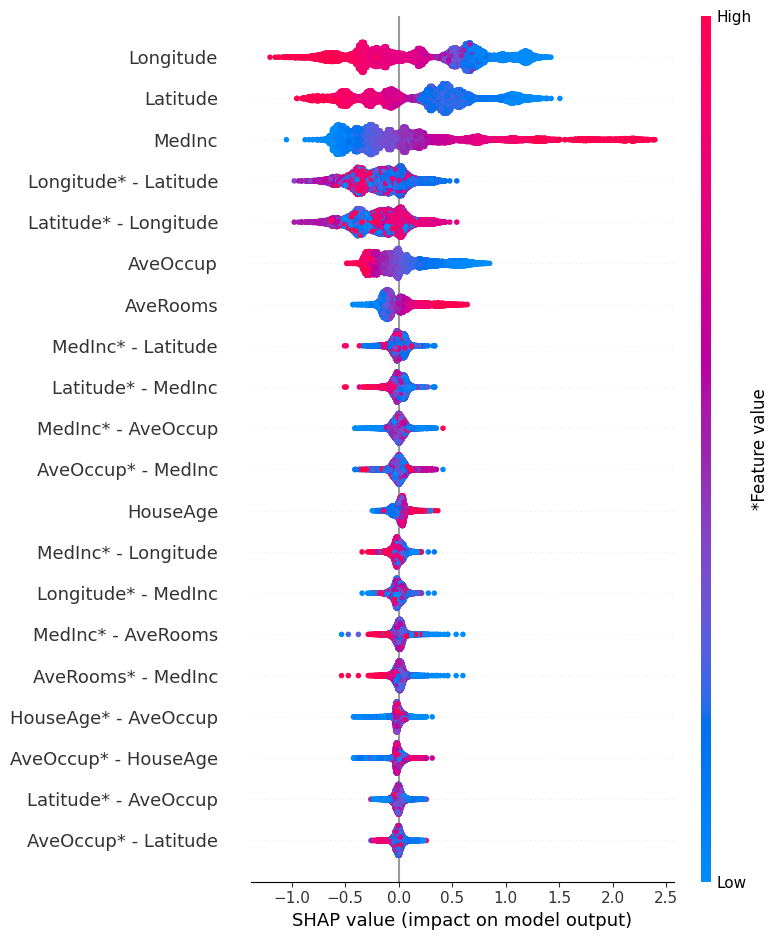

In [31]:
# 生成一个 紧凑型点图 ，可视化每个特征及其与其他特征的交互效应对模型预测的贡献。
shap.summary_plot(shap_interaction_values, X, max_display=20, plot_type="compact_dot")